<br/><br/>
#  Car Sales Prediction - Linear Regression<br/>


<img src ='https://img.indianauto.com/2020/01/24/Gruom402/car-sale-17cd.png' width="450"  height="400">

## Table of Content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Linear Regression using Python Scikit Learn](#section3)
    - 3.1 [Preparing data (X and y) for Linear Regression using Pandas](#section301)<br>
    - 3.2 [Selecting independent features X and depedent variable y](#section302)<br>
    - 3.3 [Splitting X and y into training and test datasets](#section303)<br>
    - 3.4 [Fit Linear Regression model in scikit-learn](#section304)<br>
    - 3.5 [Interpreting Model Coefficients](#section305)<br/>
4. [Model evaluation](#section4)
    - 4.1 [Model evaluation using metrics](#section401)<br>
    - 4.2 [Model Evaluation using Rsquared value.](#section402)<br>

<a id=section1></a>
## 1. Problem Statement

This dataset describes the sale value of various cars given car parameters like price, engine_size, fuel_efficiency etc.<br/>
You have to create a linear regression model using the provided predictor variables for the prediction of car sales.

<a id=section2></a>

## 2. Data Loading and Description

The dataset has 156 observation and 16 variables(columns).

### Importing Packages

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [100]:
# reading the car sales dataset

car = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")

car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


In [101]:
# understanding the dataset

car.info()
car.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        156 non-null    object 
 1   Model               156 non-null    object 
 2   Sales_in_thousands  151 non-null    float64
 3   _year_resale_value  156 non-null    float64
 4   Vehicle_type        156 non-null    object 
 5   Price_in_thousands  156 non-null    float64
 6   Engine_size         156 non-null    float64
 7   Horsepower          156 non-null    int64  
 8   Wheelbase           156 non-null    float64
 9   Width               156 non-null    float64
 10  Length              156 non-null    float64
 11  Curb_weight         156 non-null    float64
 12  Fuel_capacity       156 non-null    float64
 13  Fuel_efficiency     156 non-null    int64  
 14  Latest_Launch       156 non-null    object 
 15  Power_perf_factor   156 non-null    float64
dtypes: float

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


## To remove Nan values

info()  shows 'Sales_in_thousands' column has 5 null values.__Verifying__ - 

In [102]:
car["Sales_in_thousands"].isnull().sum()

5

'Sales_in_thousands' has 5 null values. We need to fill these null values with non-null values.
- car.groupby("Manufacturer")["Sales_in_thousands"].transform("median") - Here we group the cars by 'Manufacturer' and find the median of 'Sales_in_thousands' for each group. Then the NULL values are filled with the median for the group it belongs to. 

In [103]:
car["Sales_in_thousands"].fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)
car.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

Dropping columns that do not help in prediction of sales.

In [104]:
car=car.drop(['Manufacturer','Model','Latest_Launch'],axis=1)


In [105]:
#car.head()
print(car.shape)
car.head()

(156, 13)


,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150
1,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778
2,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,90.345000
3,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,91.389779
4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639


### Using the boxplot to understand the data distribution

<AxesSubplot:>

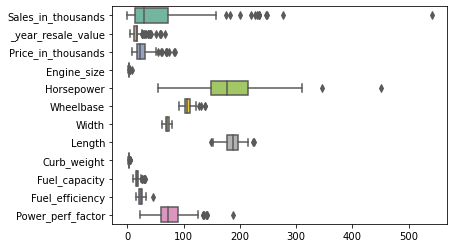

In [106]:
sns.boxplot(data=car, orient="h", palette="Set2")

In [107]:
car['Vehicle_type'].describe()

count           156
unique            2
top       Passenger
freq            116
Name: Vehicle_type, dtype: object

In [108]:
car.describe()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,57.858817,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,74.966671,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.035000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,29.213000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,71.690250,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


### Calculating and plotting heatmap correlation

In [109]:
car.corr()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
Sales_in_thousands,1.000000,-0.278950,-0.308751,0.037301,-0.190411,0.326628,0.157283,0.251017,-0.000593,0.064072,-0.017009,-0.219566
_year_resale_value,-0.278950,1.000000,0.822430,0.468813,0.696936,-0.047806,0.159591,0.023869,0.300296,0.275045,-0.357338,0.743218
Price_in_thousands,-0.308751,0.822430,1.000000,0.626910,0.838916,0.110451,0.328980,0.157119,0.527875,0.423073,-0.490249,0.897482
Engine_size,0.037301,0.468813,0.626910,1.000000,0.837360,0.472130,0.690398,0.541424,0.759525,0.663022,-0.733832,0.818198
Horsepower,-0.190411,0.696936,0.838916,0.837360,1.000000,0.286308,0.539158,0.393364,0.610637,0.499907,-0.611512,0.992926
Wheelbase,0.326628,-0.047806,0.110451,0.472130,0.286308,1.000000,0.683135,0.839639,0.651854,0.654044,-0.498075,0.258350
Width,0.157283,0.159591,0.328980,0.690398,0.539158,0.683135,1.000000,0.710435,0.721515,0.656302,-0.601539,0.510976
Length,0.251017,0.023869,0.157119,0.541424,0.393364,0.839639,0.710435,1.000000,0.628285,0.563540,-0.446256,0.354823
Curb_weight,-0.000593,0.300296,0.527875,0.759525,0.610637,0.651854,0.721515,0.628285,1.000000,0.863451,-0.818684,0.612533
Fuel_capacity,0.064072,0.275045,0.423073,0.663022,0.499907,0.654044,0.656302,0.563540,0.863451,1.000000,-0.800857,0.500009


In [110]:
car.columns
car_corr=car[['Sales_in_thousands','_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor']]

<AxesSubplot:>

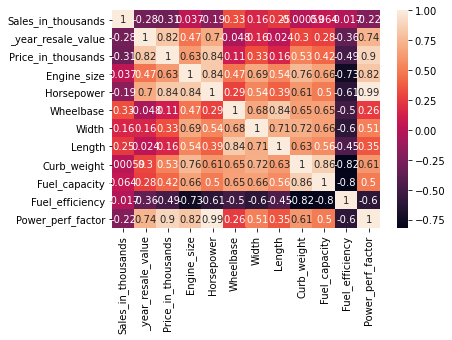

In [111]:
sns.heatmap( car_corr.corr(), annot=True )
#,'Horsepower','Width','Length','Curb_weight','Fuel_capacity','Latest_Launch','Power_perf_factor'

<a id=section3></a>

## 3. Linear Regression using Python Scikit Learn

<a id=section301></a>

### 3.1 Preparing data for Linear Regression using Pandas

One of the __assumptions for LinearRegression__ is that the independent variables should not be correlated. From the __heat map__ we see that there are some highly correlated variables (considering correlation>0.70 to be high).<br/><br/>
__Ignoring the correlated variables and preparing a new dataFrame with columns that will be used for the algorithm:__ <br/>
[''Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Wheelbase', 'Fuel_efficiency']

In [112]:
car.columns

Index(['Sales_in_thousands', '_year_resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Power_perf_factor'],
      dtype='object')

In [113]:
car_new=car[['Sales_in_thousands','Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Wheelbase', 'Fuel_efficiency']]

#[['Sales_in_thousands','Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Wheelbase', 'Fuel_efficiency']]
car_new.head()
car_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sales_in_thousands  156 non-null    float64
 1   Vehicle_type        156 non-null    object 
 2   Price_in_thousands  156 non-null    float64
 3   Engine_size         156 non-null    float64
 4   Wheelbase           156 non-null    float64
 5   Fuel_efficiency     156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB


### Converting the categorical variable 'Vehicle_type' to continuous using One-Hot-Encoding

In [114]:
car_new=pd.get_dummies(car_new, columns=['Vehicle_type'])
car_new.head()

,Sales_in_thousands,Price_in_thousands,Engine_size,Wheelbase,Fuel_efficiency,Vehicle_type_Car,Vehicle_type_Passenger
0,16.919,21.50,1.8,101.2,28,0,1
1,39.384,28.40,3.2,108.1,25,0,1
2,14.114,29.00,3.2,106.9,26,0,1
3,8.588,42.00,3.5,114.6,22,0,1
4,20.397,23.99,1.8,102.6,27,0,1


In [115]:
#Ignoring Vehicle_type_Passenger column

car_new=car_new[['Sales_in_thousands','Price_in_thousands', 'Engine_size', 'Wheelbase', 'Fuel_efficiency','Vehicle_type_Car']]
car_new

,Sales_in_thousands,Price_in_thousands,Engine_size,Wheelbase,Fuel_efficiency,Vehicle_type_Car
0,16.919,21.50,1.8,101.2,28,0
1,39.384,28.40,3.2,108.1,25,0
2,14.114,29.00,3.2,106.9,26,0
3,8.588,42.00,3.5,114.6,22,0
4,20.397,23.99,1.8,102.6,27,0
...,...,...,...,...,...,...
151,3.545,24.40,1.9,100.5,25,0
152,15.245,27.50,2.4,104.9,25,0
153,17.531,28.80,2.4,104.9,25,0
154,3.493,45.50,2.3,104.9,23,0


### Standardization.
Standardize features by removing the mean and scaling to unit standard deviation.

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler().fit(car_new)
car_new=ss.transform(car_new)
type(car_new)


numpy.ndarray

In [24]:
# Converting ndarray to DataFrame

car_new=pd.DataFrame(car_new)
type(car_new)

pandas.core.frame.DataFrame

In [25]:
# Adding columns to the new Standardized DataFrame:
car_new.columns=['Sales_in_thousands','Price_in_thousands', 'Engine_size', 'Wheelbase', 'Fuel_efficiency','Vehicle_type_Car']
car_new.head()

,Sales_in_thousands,Price_in_thousands,Engine_size,Wheelbase,Fuel_efficiency,Vehicle_type_Car
0,-0.547866,-0.413822,-1.210889,-0.825439,0.982151,-0.58722
1,-0.247234,0.070051,0.133586,0.080457,0.275002,-0.58722
2,-0.585403,0.112127,0.133586,-0.077090,0.510719,-0.58722
3,-0.659353,1.023772,0.421687,0.933837,-0.432146,-0.58722
4,-0.501322,-0.239207,-1.210889,-0.641634,0.746435,-0.58722


<a id=section302></a>

### 3.2  Selecting independent features X and depedent variable y

In [118]:
X = car_new[[ 'Price_in_thousands', 'Engine_size','Wheelbase', 'Fuel_efficiency','Vehicle_type_Car']]
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(156, 5)


In [80]:
y=car_new['Sales_in_thousands']
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(156,)


<a id=section303></a>

### 3.3 Splitting X and y into training and test datasets

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=1)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 5)
(39, 5)
(117,)
(39,)


<a id=section304></a>

### 3.4 Fit Linear Regression Model in scikit-learn

In [83]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<a id=section305></a>

### 3.5 Interpreting Model Coefficients

In [84]:
print('Intercept:',lr.intercept_)                                            
print('Coefficients:',lr.coef_)


Intercept: 0.0007549700149005294
Coefficients: [-0.46637562  0.243107    0.31100331  0.1216173   0.05457112]


In [85]:
feature_cols=[ 'Price_in_thousands','Engine_size', 'Wheelbase', 'Fuel_efficiency','Vehicle_type_Car']

In [86]:
feature_cols.insert(0,'Intercept')
coef = lr.coef_.tolist()            
coef.insert(0, lr.intercept_)       

In [87]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.0007549700149005294
Price_in_thousands -0.46637561771267494
Engine_size 0.2431069956667923
Wheelbase 0.31100331215003985
Fuel_efficiency 0.12161729721033479
Vehicle_type_Car 0.054571120769752


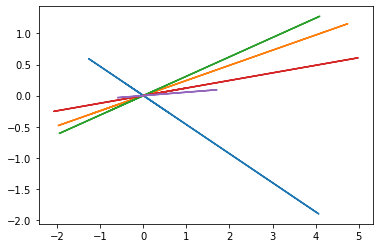

In [88]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.plot(X, line);
plt.show()

In [89]:
y_pred_test = lr.predict(X_test)  
y_pred_test.shape

(39,)

In [90]:
pred_test= pd.DataFrame(y_pred_test)
pred_test.head()

,0
0,-0.043712
1,-0.044713
2,0.194188
3,0.189923
4,-0.038810


In [91]:
y_pred_train = lr.predict(X_train)                                                    

In [92]:
pred_train= pd.DataFrame(y_pred_train)
pred_train.head()

,0
0,-2.139632
1,-0.100203
2,-0.064811
3,-2.067780
4,0.087261


<a id=section4></a>
## 4. Model evaluation 


__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that for 'x' no. of studying hours the student will score 60 marks, but the actually the student scores just 45 marks, then the error in prediction will be 15 marks.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

<a id=section401></a>
### 4.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

__Evaluating the model using MAE for both train and test__

In [93]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.5926773495866763
MAE for test set is 0.5653726622349311


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

__Evaluating the model using MSE for both train and test__

In [94]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.7866409107994231
MSE for test set is 0.6399909500295642


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

__Evaluating the model using RMSE for both train and test__

In [95]:
from sklearn import metrics

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.8869277934530089
RMSE for test set is 0.7999943437484819


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- Lower the MAE & MSE value, the higher the accuracy of prediction as there would be excellent match between the actual and predicted data set. 
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.
    - RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. 

<a id=section402></a>
### 4.2 Evaluate the model using R-square value for both train and test.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [60]:
from sklearn.metrics import r2_score
def lr():
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R-square value for training set is {}'.format(R2_train))
    print('R-square value for training set is {}'.format(R2_test))
lr()

R-square value for training set is 0.17233473638414964
R-square value for training set is 0.14185903115387777


__I performed LinearRegression on the given dataset multiple times with different settings as: manipulating X columns (col. combinations, removing outliers) and tuning parameters in train_test_split:<br/>
Inspite of various trials, the Residual Error values did not seem to reduce below RMSE_train=0.89 and RMSE_test= 0.80. These are not very ideal values for RMSE__